In [15]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/test'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 4s 0us/step


In [4]:
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/datasets/train/*')

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 407s 6s/step - loss: 2.4704 - accuracy: 0.7278 - val_loss: 2.0943 - val_accuracy: 0.5000
Epoch 2/20
61/61 [==============================] - 45s 742ms/step - loss: 0.6072 - accuracy: 0.8954 - val_loss: 2.0682 - val_accuracy: 0.6667
Epoch 3/20
61/61 [==============================] - 46s 748ms/step - loss: 0.6659 - accuracy: 0.8893 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 46s 756ms/step - loss: 0.4764 - accuracy: 0.9226 - val_loss: 0.1139 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 47s 775ms/step - loss: 0.4248 - accuracy: 0.9359 - val_loss: 0.1251 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 47s 767ms/step - loss: 0.4954 - accuracy: 0.9236 - val_loss: 0.2158 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 46s 750ms/step - loss: 0.4036 - accuracy: 0.9462 - val_loss: 2.7853e-04 - val_accuracy: 1.00

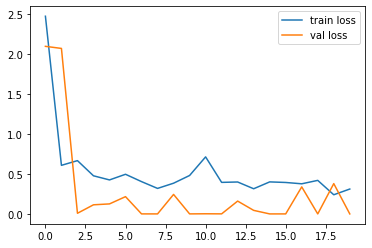

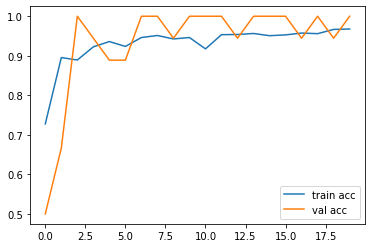

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
model.save('model_inception.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[3.3790011e-20, 1.9654978e-14, 8.5142172e-18, 1.0000000e+00],
       [5.1735533e-20, 1.0000000e+00, 2.1180726e-13, 1.0212800e-08],
       [1.0000000e+00, 0.0000000e+00, 3.3174226e-30, 1.4869284e-24],
       [5.5244234e-15, 4.0920352e-15, 1.0000000e+00, 4.5767366e-12],
       [1.0000000e+00, 1.6650987e-29, 3.8106820e-27, 0.0000000e+00],
       [3.5422261e-05, 4.4145087e-30, 9.9996459e-01, 1.0860249e-19],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.9765300e-38],
       [2.1777601e-16, 1.3022218e-31, 1.0000000e+00, 6.4432629e-19],
       [1.4066917e-21, 0.0000000e+00, 1.0000000e+00, 7.1447770e-29],
       [0.0000000e+00, 3.8379932e-19, 0.0000000e+00, 1.0000000e+00],
       [1.8966454e-12, 4.9666049e-13, 1.0000000e+00, 3.4243052e-25],
       [1.0000000e+00, 3.5716617e-08, 4.5436590e-23, 9.4716655e-18],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.7892681e-22, 2.2695414e-05, 1.7486912e-17, 9.9997735e-01],
       [4.3168992e-27, 1.0000000e+

In [20]:
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([3, 1, 0, 2, 0, 2, 1, 2, 2, 3, 2, 0, 1, 3, 1, 3, 3, 1])